In [1]:
%matplotlib inline

In [2]:
class BloomFilter:
    
    def __init__(self, m, k):
        self._filter = [False]*m
        self._hashes = [self._makehash(m, i) for i in range(k)]

    def add(self, key):
        for h in self._hashes:
            self._filter[h(key)] = True        

    @property
    def fpr(self):
        m = len(self._filter)
        n = sum(self._filter)
        k = len(self._hashes)
        return (1 - (1-1/m)**(k*n))
    
    def __contains__(self, key):
        return all(self._filter[h(key)] for h in self._hashes)
    
    def __str__(self):
        line_length = 40
        chars = "".join("🟩" if el else "⬜" for el in self._filter)
        lines = []
        for i in range(0, len(chars), line_length):
            lines.append(chars[i:i+line_length])
        return "\n".join(lines)
    
    def _makehash(self, m, i):
        return lambda key: hash(f"{key}-{i}") % m

In [3]:
bf = BloomFilter(160, 3)
bf.add("foo")

In [4]:
print(bf)

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜🟩🟩⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


In [5]:
bf.fpr

0.054864066748393836

In [6]:
"foo" in bf

True

In [7]:
"bar" in bf

False

In [8]:
bf.add("bar")

In [9]:
print(bf)

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜🟩🟩⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


In [10]:
bf.fpr

0.10671806767661551

In [11]:
"bar" in bf

True

In [12]:
bf.add("baz")
print(bf)

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜🟩🟩⬜⬜⬜⬜⬜⬜⬜⬜🟩🟩⬜🟩⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


In [13]:
bf.fpr

0.15572714723673997

In [14]:
bf.add("baa")
print(bf)

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜🟩⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜🟩🟩⬜⬜⬜⬜⬜⬜⬜⬜🟩🟩⬜🟩⬜⬜⬜🟩🟩⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


In [15]:
bf.fpr

0.20204738938460032

In [16]:
import string
from itertools import product

collisions = []
for word in product(string.ascii_lowercase, repeat=3):
    word = "".join(word)
    if word in bf and word not in ["foo", "bar", "baz", "baa"]:
        collisions.append(word)

print(collisions)

['aax', 'ehv', 'gts', 'iig', 'kak', 'maq', 'pxu', 'she', 'sym', 'uuq', 'yhk']


In [17]:
def hamming(bf1, bf2):
    if len(bf1._filter) != len(bf2._filter):
        raise ValueError("Bloom filters must have equal length")
    return sum(x != y for (x, y) in zip(bf1._filter, bf2._filter))

In [18]:
def union(bf1, bf2):
    if len(bf1._filter) != len(bf2._filter):
        raise ValueError("Bloom filters must have equal length")
    
    bf = BloomFilter(len(bf1._filter), len(bf1._hashes))
    bf._filter = [x or y for (x, y) in zip(bf1._filter, bf2._filter)]
    return bf

In [19]:
bf1 = BloomFilter(20, 3)
bf2 = BloomFilter(20, 3)
bf1.add("foo")
bf2.add("bar")

print(bf1)
print(bf2)
print(union(bf1, bf2))

⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜🟩🟩⬜
⬜🟩⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜
⬜🟩⬜⬜⬜🟩⬜⬜🟩⬜⬜⬜⬜🟩⬜⬜⬜🟩🟩⬜


In [20]:
class SBT:
    def __init__(self, name, value):
        self.name = name
        self.value = value
        self.left = None
        self.right = None
    
    @property
    def value(self):
        v = getattr(self, "_value")
        if v is None:
            if self.left and self.right:
                v = union(self.left.value, self.right.value)
            elif self.left:
                v = self.right.value
            else:
                v = self.left.value
            self._value = v
        return self._value
                
    @value.setter
    def value(self, v):
        self._value = v
    
    @property
    def is_leaf(self):
        return self.left is None and self.right is None
        
    def insert(self, name, bf):
        if self.is_leaf:
            self.left = SBT(self.name, self.value)
            self.right = SBT(name, bf)
            self.value = None
            self.name = "Union"
        else:
            if hamming(bf, self.left.value) <= hamming(bf, self.right.value):
                self.left.insert(name, bf)
            else:
                self.right.insert(name, bf)

In [21]:
def make_bloom(*words):
    bf = BloomFilter(30, 3)
    for word in words:
        bf.add(word)
    return bf

In [22]:
bf1 = make_bloom("abc", "def", "ghi")
bf2 = make_bloom("xyz", "uv")
bf3 = make_bloom("abc", "def", "xyz")
bf4 = make_bloom("abc", "def", "ghi", "jkl")

In [23]:
print(bf1)
print(bf2)
print(bf3)
print(bf4)

⬜⬜⬜⬜⬜🟩🟩⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜🟩⬜⬜⬜🟩⬜⬜🟩🟩🟩
⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜🟩⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜🟩
⬜🟩⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜🟩⬜🟩⬜🟩⬜⬜⬜⬜⬜⬜🟩⬜⬜🟩🟩🟩
⬜⬜⬜⬜⬜🟩🟩⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜🟩⬜⬜🟩⬜⬜⬜🟩⬜⬜🟩🟩🟩


In [24]:
tree = SBT("bf1", bf1)
tree.insert("bf2", bf2)
tree.insert("bf3", bf3)
tree.insert("bf4", bf4)

In [25]:
from graphviz import Digraph

g = Digraph()

def node_id(sbt):
    return str(hash(sbt))

def node_label(sbt):
    return f"{sbt.name}: {sbt.value}"

def add_node(g, node_id, node_label):
    g.node(node_id, label=node_label, shape="box")
    
def add_edge(g, node_id1, node_id2):
    g.edges([(node_id1, node_id2)])

add_node(g, node_id(tree), node_label(tree))
nodes = [tree]
while nodes:
    current = nodes.pop()
    current_id = node_id(current)
    left, right = current.left, current.right
    if left:        
        left_id = node_id(left)
        add_node(g, left_id, node_label(left))
        add_edge(g, current_id, left_id)        
        nodes.append(left)
    if right:
        right_id = node_id(right)
        add_node(g, right_id, node_label(right))
        add_edge(g, current_id, right_id)
        nodes.append(right)

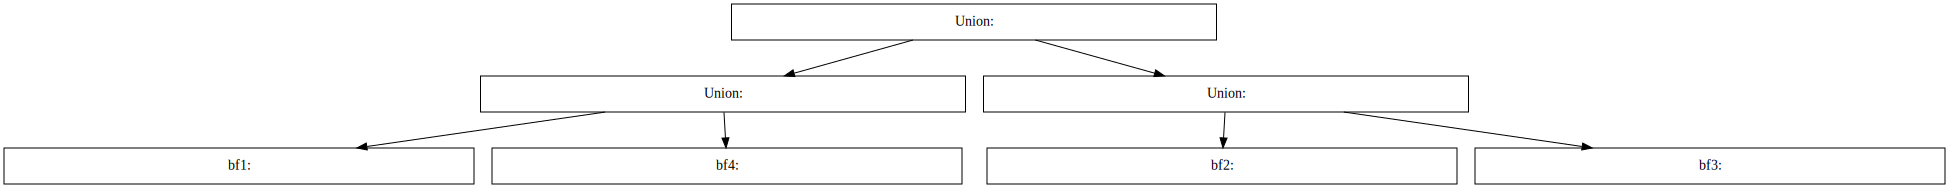

In [29]:
g


In [26]:
str(g)

'digraph {\n\t301371597 [label="Union: ⬜🟩⬜⬜⬜🟩🟩⬜⬜⬜⬜⬜⬜🟩⬜🟩⬜🟩⬜⬜🟩⬜⬜⬜🟩⬜⬜🟩🟩🟩" shape=box]\n\t301371423 [label="Union: ⬜⬜⬜⬜⬜🟩🟩⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜🟩⬜⬜🟩⬜⬜⬜🟩⬜⬜🟩🟩🟩" shape=box]\n\t301371597 -> 301371423\n\t301371426 [label="Union: ⬜🟩⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜🟩⬜🟩⬜🟩⬜⬜⬜⬜⬜⬜🟩⬜⬜🟩🟩🟩" shape=box]\n\t301371597 -> 301371426\n\t301371504 [label="bf2: ⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜🟩⬜🟩⬜⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜🟩" shape=box]\n\t301371426 -> 301371504\n\t301371486 [label="bf3: ⬜🟩⬜⬜⬜⬜🟩⬜⬜⬜⬜⬜⬜🟩⬜🟩⬜🟩⬜⬜⬜⬜⬜⬜🟩⬜⬜🟩🟩🟩" shape=box]\n\t301371426 -> 301371486\n\t301371468 [label="bf1: ⬜⬜⬜⬜⬜🟩🟩⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜⬜⬜⬜🟩⬜⬜⬜🟩⬜⬜🟩🟩🟩" shape=box]\n\t301371423 -> 301371468\n\t301384343 [label="bf4: ⬜⬜⬜⬜⬜🟩🟩⬜⬜⬜⬜⬜⬜⬜⬜🟩⬜🟩⬜⬜🟩⬜⬜⬜🟩⬜⬜🟩🟩🟩" shape=box]\n\t301371423 -> 301384343\n}\n'

In [27]:
g.render("graph.dot")

'graph.dot.pdf'